In [1]:
!pip install numpy scipy scikit-learn matplotlib pandas quandl

In [2]:
import pandas as pd
import quandl

df = quandl.get('WIKI/GOOGL')

print(df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [3]:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]

In [4]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Low'] * 100.0

In [5]:
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [6]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.441017    0.324968   44659000.0
2004-08-20   54.322689  8.537313    7.227007   22834300.0
2004-08-23   54.869377  4.062357   -1.227880   18256100.0
2004-08-24   52.597363  7.753210   -5.726357   15247300.0
2004-08-25   53.164113  3.966115    1.183658    9188600.0


In [7]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))

In [9]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [10]:
df.dropna(inplace=True)

In [11]:
X = np.array(df.drop(['label'], 1))
y = np.array(df['label'])

/var/folders/4d/b2yqq1z948ddr04glcpfpvn00000gn/T/ipykernel_87622/3704626254.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


In [12]:
X = preprocessing.scale(X)
y = np.array(df['label'])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
clf = svm.SVR()

In [15]:
clf.fit(X_train, y_train)

SVR()

In [16]:
confidence = clf.score(X_test, y_test)

In [17]:
print(confidence)

0.7837446382485199


In [18]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9792528011581986

In [19]:
for k in ['linear', 'poly', 'rbf', 'sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k, confidence)

linear 0.9785159814427623
poly 0.6535989967378435
rbf 0.7837446382485199
sigmoid 0.8957763284461133


In [20]:
X = np.array(df.drop(['label'], 1))
y = np.array(df['label'])
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
y_lately = y[-forecast_out:]
X = X[:-forecast_out]
y = y[:-forecast_out]

df.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.975826614889694


/var/folders/4d/b2yqq1z948ddr04glcpfpvn00000gn/T/ipykernel_87622/754151349.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


In [21]:
forecast_set = clf.predict(X_lately)

In [22]:
print(forecast_set, confidence, forecast_out)

[1081.53293079 1095.86648016 1109.47072599 1104.29667871 1097.91626091
 1095.54934625 1093.97324206 1090.41075649 1084.64268734 1080.20901461
 1078.08639956 1096.91701385 1115.5567947  1120.78347132 1135.41829034
 1139.65405483 1138.02436789 1135.56888065 1137.32771353 1155.25837883
 1155.23177468 1164.41406784 1161.17453558 1169.22855222 1189.33371529
 1202.35504282 1196.67955562 1208.36144163 1213.27514023 1212.6761063
 1203.39703375 1208.29253809 1207.16889399 1142.7738191  1088.77611364] 0.975826614889694 35


In [23]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

In [24]:
style.use('ggplot')

In [25]:
df['Forecast'] = np.nan

In [26]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [27]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1)] + [i]

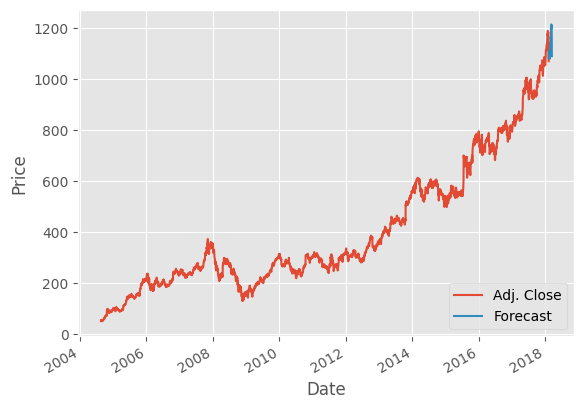

In [28]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [29]:
import pickle

In [30]:
with open('linearregression.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [31]:
pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)